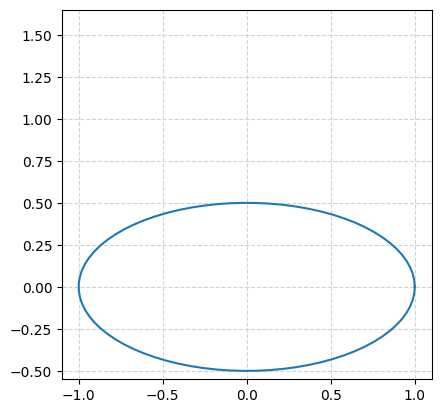

In [633]:
#1. Step: how to generate a ellipical shape 

import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=0     #x-position of the center
v=0   #y-position of the center
a=1.0     #radius on the x-axis
b=0.5  #radius on the y-axis

t = np.linspace(0, 2*pi, 80)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.plot( np.cos(a) , np.sin(b) )
plt.axis('square')
plt.grid(color='lightgray',linestyle='--')
plt.show()


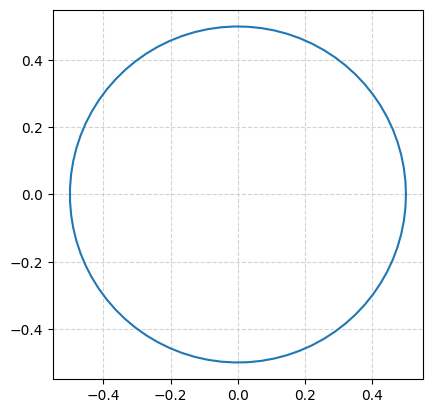

In [634]:
#2. Step: how to generate a ellipical shape with only one variable

import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=0     #x-position of the center
v=0   #y-position of the center
a=0.5    #radius on the x-axis

SuAr= 0.25*pi   #surface area of the ecclipse (= equal to SuAr of a circle with R=0.5)
b=  SuAr/(pi*a)   #radius on the y-axis

t = np.linspace(0, 2*pi, 80)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
#plt.plot( np.cos(a) , np.sin(b) )
plt.axis('square')
plt.grid(color='lightgray',linestyle='--')
plt.show()

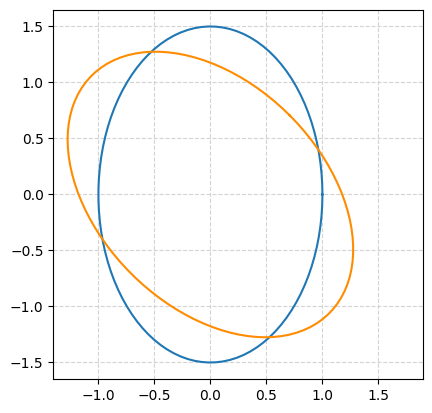

In [635]:
#optional: how to generate a rotated ellipical shape 

import numpy as np
from matplotlib import pyplot as plt
from math import pi, cos, sin

u=0      #x-position of the center
v=0     #y-position of the center
a=1      #radius on the x-axis
b=1.5      #radius on the y-axis
t_rot=pi/4 #rotation angle

t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'darkorange' )    #rotated ellipse
plt.axis('square')
plt.grid(color='lightgray',linestyle='--')
plt.show()

radius x-axis:  0.5589822872067778
radius y-axis:  0.447241362958466


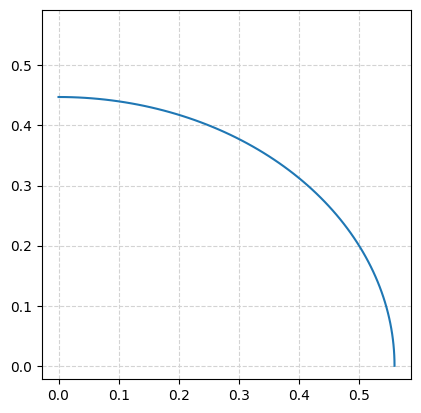

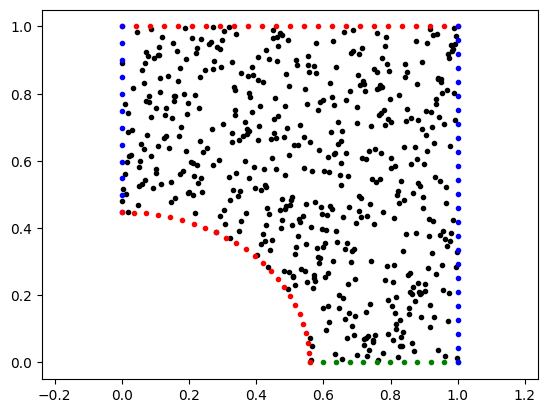

In [636]:
import torch
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt
import random

from global_constants import L, Re_x, B0, EPS0, MU, LBD
"""
#Ellipsis radius and surface area
Re_x = 0.5
"""

SuAr= 0.25*pi   #surface area of the ecclipse (= equal to SuAr of a circle with R=0.5)

a= ((Re_x * random.random()*2))  #generates radius on the x-axis between 0 and 1
while (1<a or a<0.25): a= ((Re_x * random.random()*2)) 
print("radius x-axis: ",a)
b=  SuAr/(pi*a)   #radius on the y-axis
print("radius y-axis: ",b)

t = np.linspace(0, 0.5*pi, 80)
plt.plot( a*np.cos(t) , b*np.sin(t) )
plt.axis('square')
plt.grid(color='lightgray',linestyle='--')
plt.show()

# Create collocation points
N = 25
NN = int(N * (L-R)/L)
points = L * qmc.LatinHypercube(d=2).random(N**2)


#excludes points that are inside the elliptical hole
points = points[(((points[:,0] ** 2)/(a**2)) + ((points[:,1] ** 2)/(b**2))) > 1]


x_collocation = torch.tensor(points[:,0], requires_grad=True).float()
y_collocation = torch.tensor(points[:,1], requires_grad=True).float()

# Boundaries
x_top = torch.linspace(0, L, N, requires_grad=True)
y_top = L * torch.ones((N, 1), requires_grad=True)

x_bottom = torch.linspace(a, L, NN)
y_bottom = torch.zeros((NN, 1))

x_left = torch.zeros((NN, 1))
y_left = torch.linspace(b, L, NN)

x_right = L * torch.ones((N, 1))
y_right = torch.linspace(0, L, N)

phi = np.linspace(0, 0.5 * np.pi, int(N * 0.5 * np.pi * Re_x / L))
x_hole = torch.tensor(a * np.cos(phi), requires_grad=True).float()
y_hole = torch.tensor(b * np.sin(phi), requires_grad=True).float()
n_hole = torch.tensor(np.stack([-np.cos(phi), -np.sin(phi)]).T).float()

# Visualize geometry (Dirichlet blue, Neumann red)
plt.plot(x_collocation.detach(), y_collocation.detach(), ".k")
plt.plot(x_top.detach(), y_top.detach(), ".r")
plt.plot(x_bottom, y_bottom, ".g")
plt.plot(x_left, y_left, ".b")
plt.plot(x_right, y_right, ".b")
t = np.linspace(0, 0.5*pi, N)
plt.plot( a*np.cos(t) , b*np.sin(t), ".r")
#plt.plot(x_hole.detach(), y_hole.detach(), ".r")
plt.axis("equal");